In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import pandas as pd

c:\anaconda\envs\transformers\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#dataset = pd.read_csv('Symptom2Disease.csv')
# 使用 'ISO-8859-1' 编码来读取CSV文件
dataset = pd.read_csv('drugsCom/drugsComTrain_raw.csv', encoding='ISO-8859-1')

dataset = dataset.dropna()
dataset = dataset.drop_duplicates(subset='review')
#dataset = dataset[['label','text']]


In [3]:
dataset =dataset[['review','rating','usefulCount']]
def label_rating(rating):
    if 1 <= rating <= 5:
        return 0
    elif 6 <= rating <= 10:
        return 1
# 使用 apply 函数来创建新的 'label' 列
dataset['label'] = dataset['rating'].apply(label_rating)





In [4]:
dataset


,review,rating,usefulCount,label
0,"""It has no side effect, I take it in combinati...",9,27,1
1,"""My son is halfway through his fourth week of ...",8,192,1
2,"""I used to take another oral contraceptive, wh...",5,17,0
3,"""This is my first time using any form of birth...",8,10,1
4,"""Suboxone has completely turned my life around...",9,37,1
...,...,...,...,...
161289,"""Up to 800mg seems to work about once every 2n...",1,10,0
161290,"""I have only been on Tekturna for 9 days. The ...",7,18,1
161292,"""I wrote my first report in Mid-October of 201...",10,125,1
161295,"""I&#039;ve been on thyroid medication 49 years...",10,79,1


In [5]:
#data=dataset[['review','label','usefulCount']]
data=dataset[['review','label','usefulCount']]
print(data)

                                                   review  label  usefulCount
0       "It has no side effect, I take it in combinati...      1           27
1       "My son is halfway through his fourth week of ...      1          192
2       "I used to take another oral contraceptive, wh...      0           17
3       "This is my first time using any form of birth...      1           10
4       "Suboxone has completely turned my life around...      1           37
...                                                   ...    ...          ...
161289  "Up to 800mg seems to work about once every 2n...      0           10
161290  "I have only been on Tekturna for 9 days. The ...      1           18
161292  "I wrote my first report in Mid-October of 201...      1          125
161295  "I&#039;ve been on thyroid medication 49 years...      1           79
161296  "I&#039;ve had chronic constipation all my adu...      1          116

[112105 rows x 3 columns]


In [6]:

top_1000_per_label = data.sort_values('usefulCount', ascending=False).groupby('label').head(500)
#top_1000_per_label = data.sort_values('usefulCount', ascending=False).groupby('label')
label_counts = top_1000_per_label['label'].value_counts()
datas=top_1000_per_label[['review','label']]
print(label_counts)
print(datas)


label
1    500
0    500
Name: count, dtype: int64
                                                   review  label
6716    "I remember reading people&#039;s opinions, on...      1
4249    "I have had my IUD for over a year now and I t...      1
146145  "I&#039;ve been on Zoloft 50mg for over two ye...      1
16889   "I have used this pill off and on for the past...      1
2039    "I responded after one week. The side effects ...      1
...                                                   ...    ...
11441   "Worked effectively lo lower bp, but within a ...      0
160496  "I started Prozac 20mg Friday 3/28/14 its been...      0
3894    "I took it for fibromyalgia for 4 weeks. Had l...      0
40253   "I have had this medicine for a week now. I am...      0
18936   "Lowers cholestorol but I have the oddest side...      0

[1000 rows x 2 columns]


In [7]:
import numpy as np
#datas = data[['review', 'label']]
texts = np.array(datas['review'])
labels = np.array(datas['label'])
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [8]:
texts_train[0]

'"I&#039;m posting after reading all the negative side effects of Implanon. I had Implanon inserted over a month ago and have not had any terrible side effects. I had light spotting the second week. I noticed food cravings but it is nothing unbearable. Before starting Implanon I had begun weight watchers and an exercise routine, I&#039;ve been sticking with it and have continued to lose weight while on Implanon. The insertion process was not a big deal either, the lidocaine pinched but after that the only feeling was pressure during insertion. Slight bruising and tenderness after but only for a a few days. I hope this post reaches out to someone because I almost backed out last minute due to all of the negative posts on this product."'

In [9]:
print(labels_train[:100])

[1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1
 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1]


In [10]:
#vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [11]:

from sklearn.metrics import accuracy_score
from tqdm import tqdm

from sklearn.svm import SVC,LinearSVC
#clf = SVC(C=1.0)
#clf = SVC(kernel='rbf')
clf = LinearSVC(C=999.0, penalty='l1', dual=False)


# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()

# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(C=1.0, penalty='l2')

from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()
#clf = LogisticRegression(C=1.0, penalty='l2')
#clf = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(alpha=0.1)
#clf = LinearRegression()

clf.fit(X_train, labels_train)

# 预测
labels_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(labels_test, labels_pred)
print('Accuracy:', accuracy)

Accuracy: 0.755


c:\anaconda\envs\transformers\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
test = pd.read_csv('drugsCom/drugsComTest_raw.csv', encoding='ISO-8859-1')

test = test.dropna()
test = test.drop_duplicates(subset='review')
test=test[['review','rating']]
def label_rating(rating):
    if 1 <= rating <= 5:
        return 0
    elif 6 <= rating <= 10:
        return 1

test['label'] = test['rating'].apply(label_rating)
test=test[['review','label']]
n = 1000
sampled_test = test.groupby('label').sample(n)
test_vec = vectorizer.transform(sampled_test['review'])
pred = clf.predict(test_vec)
accuracy = accuracy_score(sampled_test['label'], pred)
print('Accuracy:', accuracy)


Accuracy: 0.6425


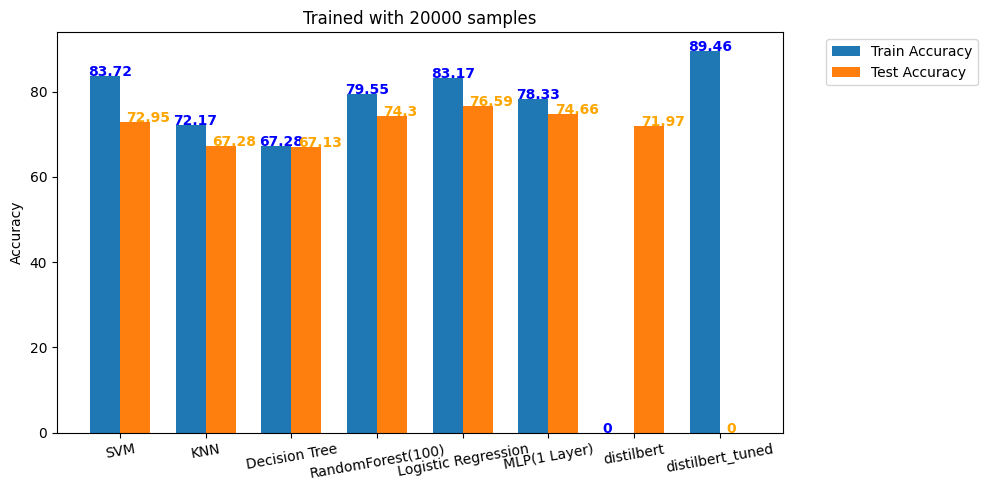

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#distilbert 71.97, 86
models = ['SVM', 'KNN', 'Decision Tree', 'RandomForest(100)', 'Logistic Regression', 'MLP(1 Layer)','distilbert','distilbert_tuned']

#models = ['SVM', 'KNN', 'Decision Tree', 'RandomForest(100)', 'Logistic Regression', 'MLP(1 Layer)']

models2 = ['SVM', 'KNN', 'Decision Tree', 'RandomForest(100)', 'Logistic Regression', 'MLP(1 Layer)','distilbert','distilbert_tuned']
#train 3000
#train_acc = [0.8441666666666666, 0.7741666666666667, 0.6941666666666667, 0.8116666666666666, 0.8391666666666666, 0.8258333333333333]
#test_acc = [0.7295, 0.6501, 0.62225, 0.67515, 0.72235, 0.7216]

#train 10000
train_acc = [83.725, 72.175, 67.275, 79.55, 83.175, 78.325, 0, 89.46]
test_acc = [72.95, 67.275, 67.13, 74.295, 76.59, 74.655,71.97,0]

x = np.arange(len(models))  # the label locations
x2 = np.arange(len(models2))  # the label locations


width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))  # Increase the size of the figure
rects1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy')
rects2 = ax.bar(x2 + width/2, test_acc, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Trained with 20000 samples')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move the legend outside of the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on the top of the bars
for i, v in enumerate(train_acc):
    ax.text(i - width/2-0.2, v + 0.01, str(round(v, 2)), color='blue', fontweight='bold')

for i, v in enumerate(test_acc):
    ax.text(i + width/2-0.1, v + 0.01, str(round(v, 2)), color='orange', fontweight='bold')

plt.xticks(rotation=10)
fig.tight_layout()

plt.show()

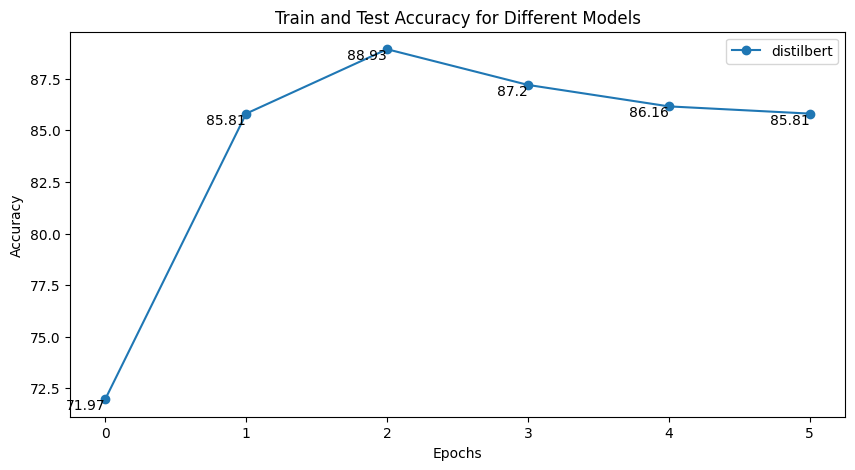

In [14]:
plt.figure(figsize=(10,5))
epochs = ['0','1','2','3','4','5']
acc= [71.97,85.81,88.93,87.20 ,86.16,85.81]
#acc = [71.97,85.81,84.43,87.20,86.16,86.85]
plt.plot(epochs, acc, marker='o', label='distilbert')
#plt.plot(models, test_acc, marker='o', label='Test Accuracy')

for i in range(len(epochs)):
    plt.text(epochs[i], acc[i]-0.5, str(acc[i]), ha='right')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Models')
plt.legend()
plt.show()